**A DEEP LEARNING APPROACH TO MOVIE RECOMMENDATION SYSTEMS USING MATRIX FACTORIZATION**

  1.Importing The Necessary Libraries





In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.callbacks import EarlyStopping

2.Load Dataset


In [2]:
data = pd.read_csv("ratings.csv")

In [3]:
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


from matplotlib import pyplot as plt
_df_0['movieId'].plot(kind='hist', bins=20, title='movieId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='movieId', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='rating', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['userId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'userId'}, axis=1)
              .sort_values('userId', ascending=True))
  xs = counted['userId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('userId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('userId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['movieId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'movieId'}, axis=1)
              .sort_values('movieId', ascending=True))
  xs = counted['movieId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('movieId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('movieId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['rating']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'rating'}, axis=1)
              .sort_values('rating', ascending=True))
  xs = counted['rating']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('rating', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rating')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['movieId'].plot(kind='line', figsize=(8, 4), title='movieId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

4. Train-Test Split

In [4]:
# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

4. Data Preprocessing

In [5]:
# Number of unique users and movies
n_users = len(data.userId.unique())
n_movies = len(data.movieId.unique())

In [6]:
# Number of unique users and movies
n_users = max(data.userId) + 1
n_movies = max(data.movieId) + 1

In [7]:
# Define the embedding size
embedding_size = 100

5. Deep Matrix Factorization Model

In [8]:
# Build the model (with additional hidden layers)
user_input = Input(shape=(1,))
user_embedding = Embedding(n_users, embedding_size)(user_input)
user_flat = Flatten()(user_embedding)

movie_input = Input(shape=(1,))
movie_embedding = Embedding(n_movies, embedding_size)(movie_input)
movie_flat = Flatten()(movie_embedding)

dot_product = Dot(axes=1)([user_flat, movie_flat])

In [9]:
# Additional hidden layers for depth
hidden1 = Dense(64, activation='relu')(dot_product)
hidden2 = Dense(32, activation='relu')(hidden1)

In [10]:
# Output layer
output = Dense(1)(hidden2)

In [11]:
model = Model(inputs=[user_input, movie_input], outputs=output)

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')

6. Model Training

In [13]:
# Train the model
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
model.fit([train.userId, train.movieId], train.rating,
          validation_data=([test.userId, test.movieId], test.rating),
          epochs=5, batch_size=128, callbacks=[early_stopping])

Epoch 1/5
631/631 [==============================] - 303s 478ms/step - loss: 2.0674 - val_loss: 0.8702
Epoch 2/5
631/631 [==============================] - 285s 452ms/step - loss: 0.4420 - val_loss: 0.8681
Epoch 3/5
631/631 [==============================] - 296s 469ms/step - loss: 0.1652 - val_loss: 0.8781
Epoch 4/5
631/631 [==============================] - 282s 447ms/step - loss: 0.0853 - val_loss: 0.9004
Epoch 5/5
631/631 [==============================] - 300s 476ms/step - loss: 0.0662 - val_loss: 0.9042


7. Evaluation

In [14]:
# Evaluate the model
loss = model.evaluate([test.userId, test.movieId], test.rating)
print("Test Loss:", loss)

631/631 [==============================] - 1s 1ms/step - loss: 0.8681
Test Loss: 0.868089497089386


8. Recommendations

In [15]:
import numpy as np

# Function to get recommendations for a user
def get_recommendations(user_id, model, n_recommendations=5):
    # Create a list of all movie IDs
    all_movie_ids = np.array(list(range(n_movies)))

    # Repeat the user ID for all movie IDs to predict ratings for all movies for this user
    user_ids = np.array([user_id] * n_movies)

    # Predict ratings for all movies for this user
    predicted_ratings = model.predict([user_ids, all_movie_ids])

    # Sort the movies based on predicted ratings in descending order
    sorted_indices = np.argsort(predicted_ratings.flatten())[::-1]

    # Get top n recommendations
    top_n_indices = sorted_indices[:n_recommendations]

    return all_movie_ids[top_n_indices]

# Get recommendations for user with ID 100
user_id = 100
recommendations = get_recommendations(user_id, model)

print("Top 5 movie recommendations for user", user_id, ":")
for movie_id in recommendations:
    print("Movie ID:", movie_id)


6051/6051 [==============================] - 8s 1ms/step
Top 5 movie recommendations for user 100 :
Movie ID: 1441
Movie ID: 2423
Movie ID: 5380
Movie ID: 724
Movie ID: 4246


In [16]:
import pandas as pd

# Assuming the movies.csv file has columns 'movieId' (matches the IDs in your recommendation system), 'title', and other relevant information

ratings_data = pd.read_csv("ratings.csv")
movies_data = pd.read_csv("movies.csv")

# Merge ratings and movies data based on movie ID
merged_data = ratings_data.merge(movies_data, on='movieId')

# Now you can use the merged_data to get movie titles and descriptions along with recommendations
def get_recommendations_with_details(user_id, model, n_recommendations=5):
  all_movie_ids = np.array(list(range(n_movies)))
  user_ids = np.array([user_id] * n_movies)
  predicted_ratings = model.predict([user_ids, all_movie_ids])
  sorted_indices = np.argsort(predicted_ratings.flatten())[::-1]
  top_n_indices = sorted_indices[:n_recommendations]

  recommendations = merged_data[merged_data['movieId'].isin(all_movie_ids[top_n_indices])]
  return recommendations[['title', 'movieId']]  # Return only title and movieId for recommendations

# Example usage with movie titles
user_id = 100
recommendations = get_recommendations_with_details(user_id, model)

print("Top 5 movie recommendations (with titles) for user", user_id, ":")
for index, row in recommendations.iterrows():
  print("Movie ID:", row['movieId'], "Title:", row['title'])


6051/6051 [==============================] - 8s 1ms/step
Top 5 movie recommendations (with titles) for user 100 :
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Title: Bridget Jones's Diary (2001)
Movie ID: 4246 Titl

9.Calculate MSE/RMSE

In [18]:
loss = model.evaluate([test.userId, test.movieId], test.rating)
print("Test Mean Squared Error:", loss)

631/631 [==============================] - 1s 1ms/step - loss: 0.8681
Test Mean Squared Error: 0.868089497089386


In [21]:
# MSE can be further utilized to calculate RMSE (square root of MSE)
RMSE = np.sqrt(loss)
print("Test Root Mean Squared Error:", RMSE)

Test Root Mean Squared Error: 0.9317132053853192


In [23]:
from sklearn.metrics import mean_squared_error

# Evaluate the model (assuming 'model' is your trained model, 'test' is your testing set, and 'test.rating' are the actual ratings)
y_true = test.rating  # Actual ratings
y_pred = model.predict([test.userId, test.movieId])  # Predicted ratings
mf_mse = mean_squared_error(y_true, y_pred)


631/631 [==============================] - 3s 4ms/step


In [25]:
# Assuming 'test.userId' and 'test.movieId' are available in your testing set

# Calculate average rating across all users
baseline_rating = test.rating.mean()

# Predict the baseline rating for all user-movie interactions in the testing set
baseline_predictions = np.full(len(test), baseline_rating)

# Calculate MSE using the actual ratings ('test.rating') and baseline predictions
from sklearn.metrics import mean_squared_error
baseline_mse = mean_squared_error(test.rating, baseline_predictions)


10.Visualize Model Performance

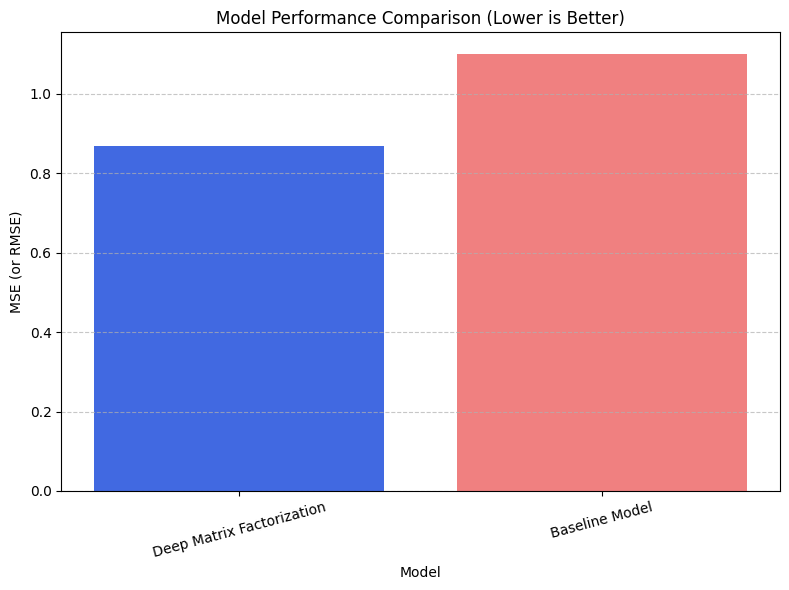

In [26]:
import matplotlib.pyplot as plt


# Create a list of model names
model_names = ['Deep Matrix Factorization', 'Baseline Model']

# Create a list of MSE (or RMSE) values
mse_values = [mf_mse, baseline_mse]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, mse_values, color=['royalblue', 'lightcoral'])
plt.xlabel('Model')
plt.ylabel('MSE (or RMSE)')
plt.title('Model Performance Comparison (Lower is Better)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability if many models are included
plt.xticks(rotation=15)  # Uncomment if needed

plt.tight_layout()
plt.show()
